In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# ==== User settings ====
# Folder containing the CSV files
folder = 'D:/Bac_shell_ver3'  # <-- change this to your actual folder

# Input CSV filenames
filenames = [
    '807_negative_without_bac_Day0_20251202_0053.csv',
    '808_negative_without_bac_Day0_20251202_0118.csv',
    '809_negative_without_bac_Day0_20251202_0141.csv'
]

# Column name for the DAPI signal in the CSV
dapi_column_name = 'FITC-agarose-mask_DAPI_mean_intensity_corrected'

C:\Users\xubin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xubin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xubin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


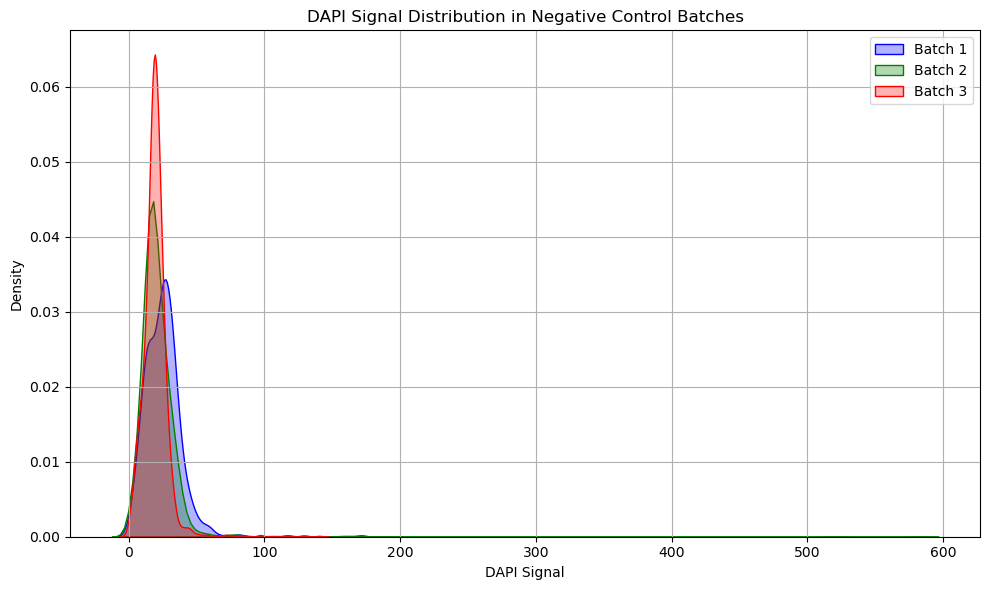

Batch 1:
  99th percentile: 60.11
  Mean + 3*std: 66.23

Batch 2:
  99th percentile: 76.46
  Mean + 3*std: 84.53

Batch 3:
  99th percentile: 49.49
  Mean + 3*std: 50.14



In [ ]:
# Build full paths using os.path.join
filepaths = [os.path.join(folder, fname) for fname in filenames]

# Initialize list to store DAPI signals
dapi_signals = []

# Load data from each file
for path in filepaths:
    df = pd.read_csv(path)

    # Assumes the CSV has a header row and includes the specified DAPI column
    signals = df[dapi_column_name].dropna()  # drop NaNs if any
    dapi_signals.append(signals)

# Plot KDEs (optionally with histograms)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, signals in enumerate(dapi_signals):
    sns.kdeplot(signals, label=f'Batch {i+1}', color=colors[i], fill=True, alpha=0.3)
    # Optional: also plot histogram overlay if desired
    # plt.hist(signals, bins=50, density=True, alpha=0.2, color=colors[i])

plt.xlabel('DAPI Signal')
plt.ylabel('Density')
plt.title('DAPI Signal Distribution in Negative Control Batches')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print 99th percentile and mean + 3*std for each batch
for i, signals in enumerate(dapi_signals):
    p99 = np.percentile(signals, 99)
    mean = np.mean(signals)
    std = np.std(signals)
    threshold = mean + 3 * std

    print(f'Batch {i+1}:')
    print(f'  99th percentile: {p99:.2f}')
    print(f'  Mean + 3*std: {threshold:.2f}\n')

C:\Users\xubin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


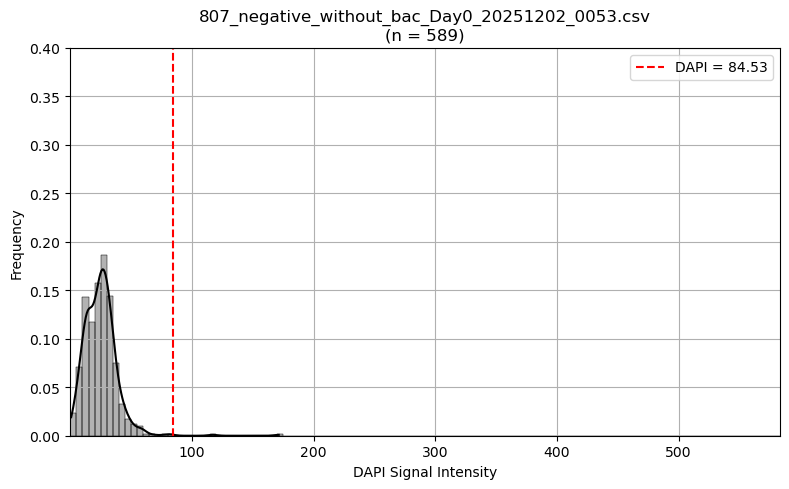

807_negative_without_bac_Day0_20251202_0053.csv:
  Sample size: 589
  99th percentile: 60.11
  Mean + 3*std: 66.23



C:\Users\xubin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


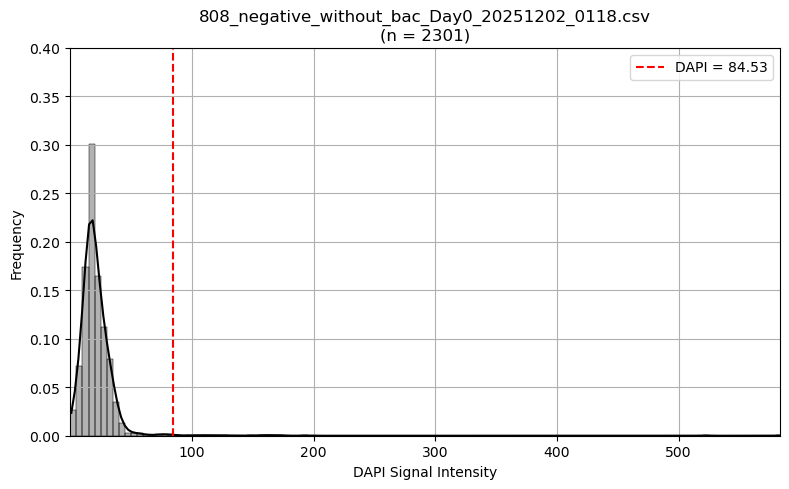

808_negative_without_bac_Day0_20251202_0118.csv:
  Sample size: 2301
  99th percentile: 76.46
  Mean + 3*std: 84.53



C:\Users\xubin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


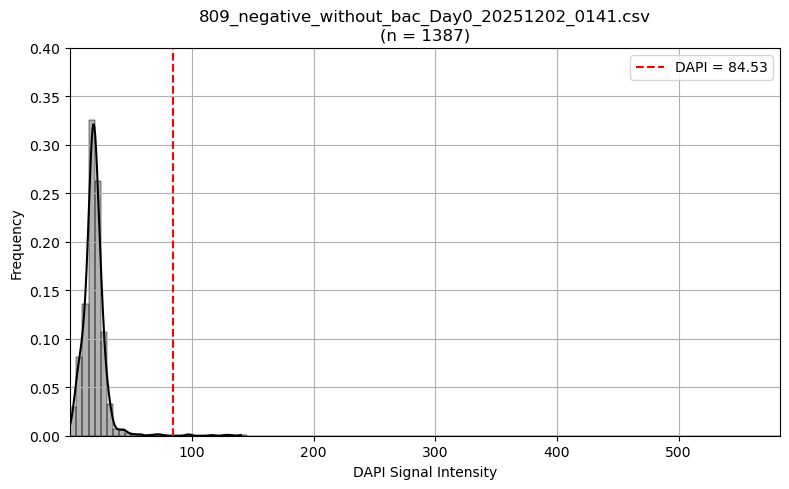

809_negative_without_bac_Day0_20251202_0141.csv:
  Sample size: 1387
  99th percentile: 49.49
  Mean + 3*std: 50.14



In [ ]:
### Additional settings ###
dapi_cutoff_line = 84.53
output_format = 'svg'  # Can be 'svg' or other formats like 'png'
output_folder = folder  # Save figures in the same folder


filepaths = [os.path.join(folder, fname) for fname in filenames]
dapi_signals = []
all_values = []

# Load data
for path in filepaths:
    df = pd.read_csv(path)
    signals = df[dapi_column_name].dropna()
    dapi_signals.append(signals)
    all_values.extend(signals)

# Define common x-axis range and bins
xmin = min(all_values)
xmax = max(all_values)
bin_width = 5.0  # adjust if needed for resolution
bins = np.arange(xmin, xmax + bin_width, bin_width)

# Plot and save
# Step 1: Estimate global max y value (frequency)
max_y = 0
for signals in dapi_signals:
    counts, _ = np.histogram(signals, bins=bins)
    freq = counts / len(signals)
    max_y = max(max_y, max(freq))
# Step 2: Plot each figure using stat='probability' and uniform y-limit
for i, signals in enumerate(dapi_signals):
    n_samples = len(signals)
    filename = filenames[i]
    shortname = os.path.splitext(filename)[0]

    plt.figure(figsize=(8, 5))
    sns.histplot(signals, bins=bins, kde=True, color='black', alpha=0.3, stat='probability')  # <- normalized
    plt.axvline(dapi_cutoff_line, color='Red', linestyle='--', label='DAPI = 84.53')

    plt.xlabel('DAPI Signal Intensity')
    plt.ylabel('Frequency')  # <- updated label
    plt.title(f'{filename}\n(n = {n_samples})')
    plt.xlim(xmin, xmax)
    plt.ylim(0,0.4)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save figure
    output_path = os.path.join(output_folder, f'{shortname}_histogram.{output_format}')
    plt.savefig(output_path, format=output_format)
    plt.show()

    # Summary statistics
    p99 = np.percentile(signals, 99)
    mean = np.mean(signals)
    std = np.std(signals)
    threshold = mean + 3 * std

    print(f'{filename}:')
    print(f'  Sample size: {n_samples}')
    print(f'  99th percentile: {p99:.2f}')
    print(f'  Mean + 3*std: {threshold:.2f}\n')

In [ ]:
# Calculate and print 99th percentile and mean + 3*std for each batch
for i, (signals, file) in enumerate(zip(dapi_signals, filenames)):
    p99 = np.percentile(signals, 99)
    mean = np.mean(signals)
    std = np.std(signals)
    threshold = mean + 3 * std

    print(f'File: {file}')
    print(f'  Batch {i+1}:')
    print(f'    99th percentile: {p99:.2f}')
    print(f'    Mean + 3*std: {threshold:.2f}\n')

File: 807_negative_without_bac_Day0_20251202_0053.csv
  Batch 1:
    99th percentile: 60.11
    Mean + 3*std: 66.23

File: 808_negative_without_bac_Day0_20251202_0118.csv
  Batch 2:
    99th percentile: 76.46
    Mean + 3*std: 84.53

File: 809_negative_without_bac_Day0_20251202_0141.csv
  Batch 3:
    99th percentile: 49.49
    Mean + 3*std: 50.14

